# Refection and refraction

## Refection and refraction at a surface

In [1]:
from diffractio import np
from diffractio import degrees, um


from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_masks_XZ import Scalar_mask_XZ

In [2]:
from diffractio.vector_fields_X import Vector_field_X
from diffractio.vector_fields_XZ import Vector_field_XZ

In [3]:
from py_pol.jones_vector import Jones_vector

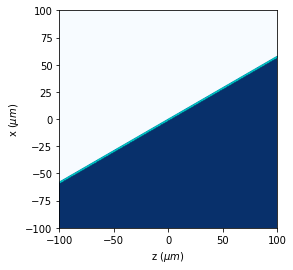

In [4]:

x0 = np.linspace(-100*um, 100*um, 2048)
z0 = np.linspace(-100*um, 100*um, 2048)
wavelength = 5*um

u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.gauss_beam(A=1, x0=0*um, w0=10*um, z0=0*um)


u_xz = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
u_xz.incident_field(u0)
u_xz.semi_plane(r0=(0*um, 0*um), refractive_index=1.5, angle=60*degrees)
u_xz.draw_refractive_index(scale='scaled')

In [5]:
j0 = Jones_vector().general_azimuth_ellipticity(azimuth=0*degrees, ellipticity=0*degrees)
print(j0)


E = 
[+1.000]   
[+0.000]   



In [6]:
EH_xz = Vector_field_XZ(x0,z0, wavelength)
EH_xz.incident_field(u0=u0, j0=j0)
EH_xz.refractive_index_from_scalarXZ(u_xz)

In [7]:
EH_xz.FP_WPM(has_edges=False, pow_edge=100,  verbose=True)

Time = 15.45 s, time/loop = 7.544 ms


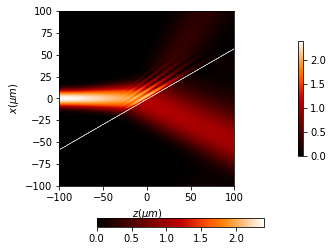

In [8]:
EH_xz.draw('intensity', logarithm=1e1, draw_borders=True, scale='scaled')

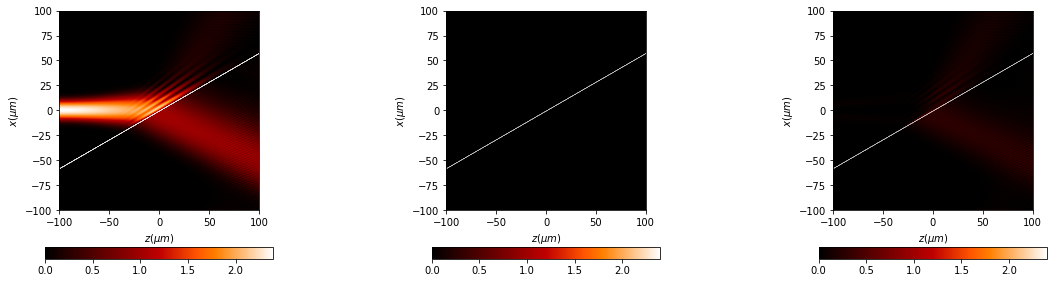

In [9]:
EH_xz.draw('intensities', logarithm=1e1, draw_borders=True, scale='scaled')


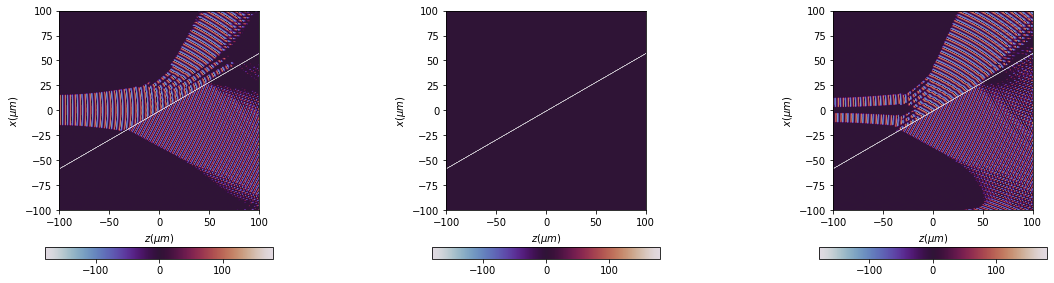

In [10]:
EH_xz.draw('phases', percentage_intensity=0.01, draw_borders=True, scale='scaled')

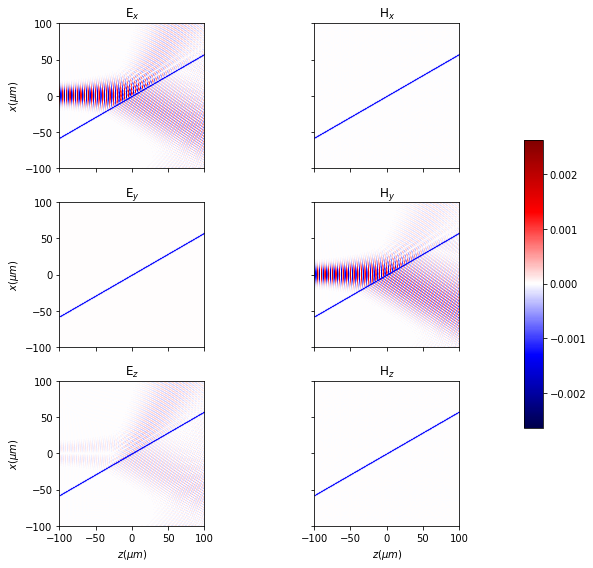

In [11]:
EH_xz.draw('EH', draw_z=True, draw_borders=True, scale='scaled')

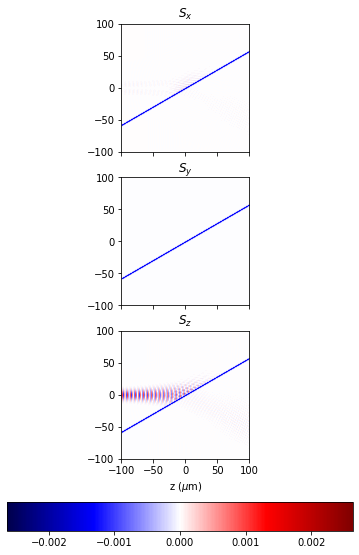

In [12]:
P_vector = EH_xz.Poynting_vector(draw_borders=True, scale='scaled')

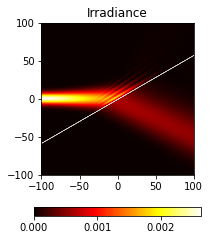

In [13]:
Irr= EH_xz.irradiance(has_draw=True, draw_borders=True, scale='scaled')

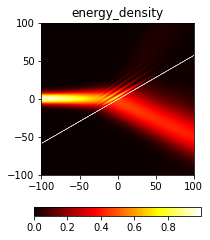

In [14]:
EH_xz.energy_density(has_draw=True, draw_borders=True, scale='scaled')

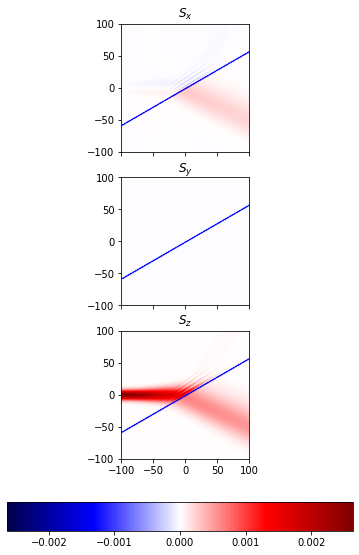

In [15]:
Sx, Sy, Sz = EH_xz.Poynting_vector_averaged(has_draw=True, draw_borders=True, scale='scaled')

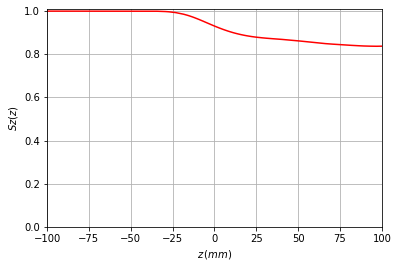

In [16]:
Sz_c = EH_xz.check_energy()

## At a layer

n = 1.18


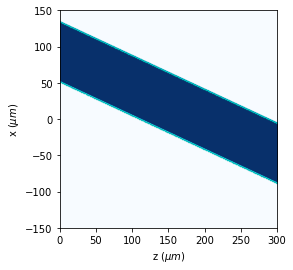

In [17]:

x0 = np.linspace(-150*um, 150*um, 1024)
z0 = np.linspace(0*um, 300*um, 1024)
wavelength = 5*um

u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.gauss_beam(A=1, x0=0*um, w0=20*um, z0=100*um)

angle=25*degrees
refractive_index = 1/np.arctan(np.pi/2-angle)
print("n = {:2.2f}".format(refractive_index))

u_xz = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
u_xz.incident_field(u0)
u_xz.rectangle(r0=(0*um, 200), size=(75,500), refractive_index = refractive_index, angle=angle)
u_xz.draw_refractive_index(scale='scaled')

In [18]:

j0 = Jones_vector().general_azimuth_ellipticity(azimuth=0*degrees, ellipticity=0*degrees)
print(j0)


E = 
[+1.000]   
[+0.000]   



In [19]:
EH_xz = Vector_field_XZ(x0,z0, wavelength)
EH_xz.incident_field(u0=u0, j0=j0)
EH_xz.refractive_index_from_scalarXZ(u_xz)

In [20]:
EH_xz.FP_WPM(has_edges=1)

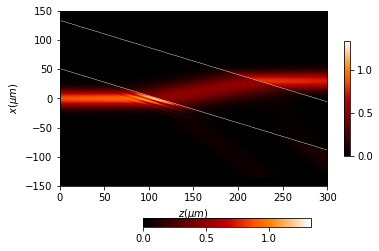

In [21]:
EH_xz.draw('intensity')

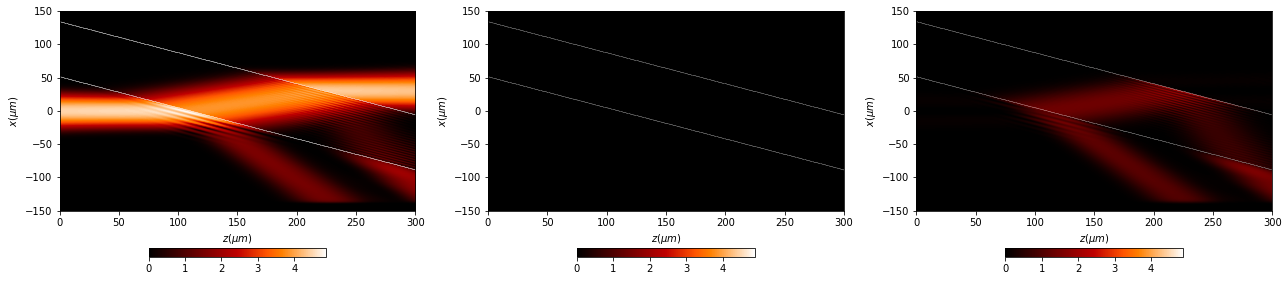

In [22]:
EH_xz.draw('intensities', logarithm=1e2)


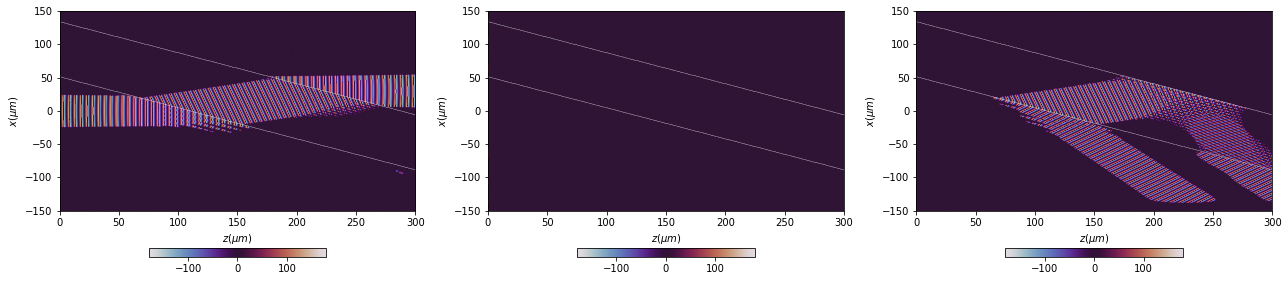

In [23]:
EH_xz.draw('phases')

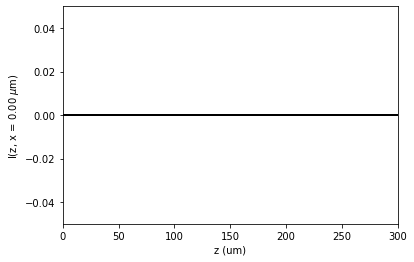

In [24]:
u_xz.profile_longitudinal(x0=0)

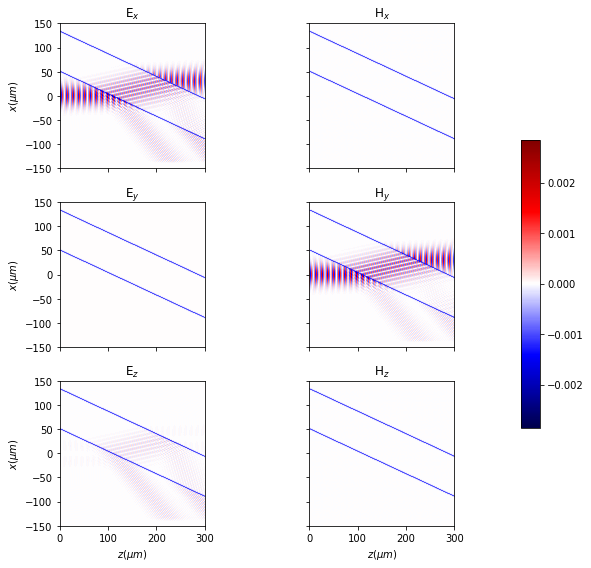

In [25]:
EH_xz.draw('EH', logarithm=False, normalize= False, cut_value=None, draw_z=True)

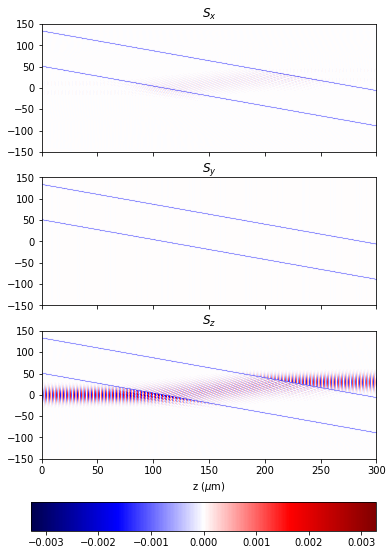

In [26]:
P_vector = EH_xz.Poynting_vector()

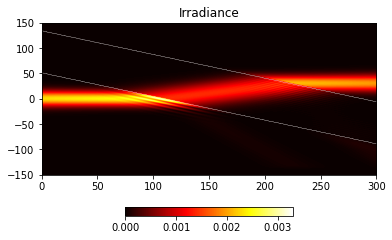

In [27]:
Irr= EH_xz.irradiance( has_draw=True)

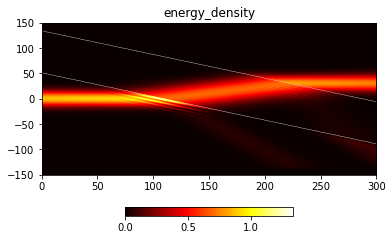

In [28]:
EH_xz.energy_density(has_draw=True)

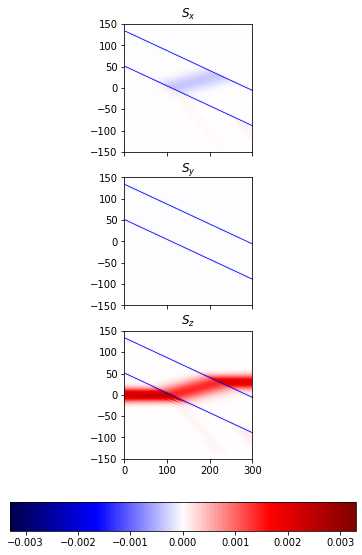

In [29]:
Sx, Sy, Sz = EH_xz.Poynting_vector_averaged(has_draw=True, draw_borders=True, scale='scaled')

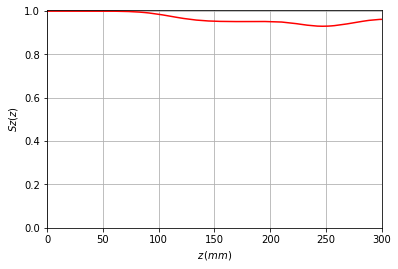

In [30]:
Sz_c = EH_xz.check_energy()
